# Sheet 2

In [1]:
import pandas as pd
file_path = '/data/notebook_files/creditcard.csv'
credit_card_data = pd.read_csv(file_path)
print(credit_card_data.info())
print(credit_card_data.describe())
print(credit_card_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Class Distribution

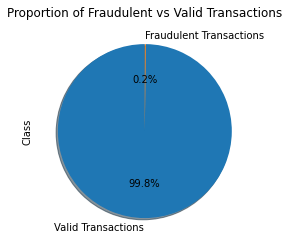

In [2]:
import matplotlib.pyplot as plt

fraud_dist = credit_card_data['Class'].value_counts()
fraud_dist.plot(kind='pie', labels=['Valid Transactions', 'Fraudulent Transactions'],
                autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Fraudulent vs Valid Transactions')
plt.show()

# Feature Distribution 

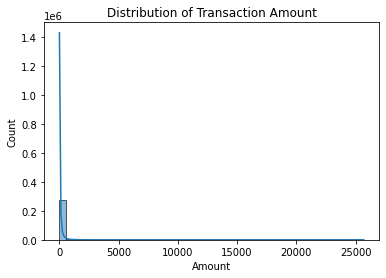

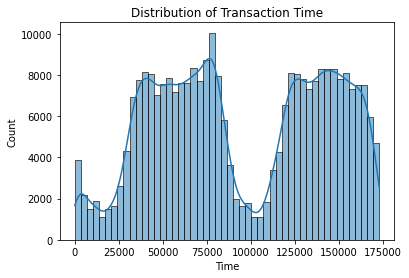

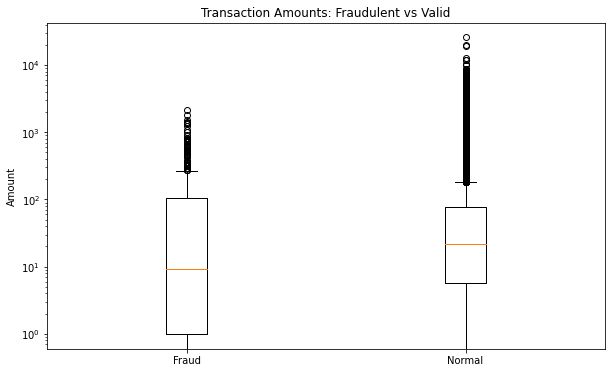

In [3]:
import seaborn as sns

sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

sns.histplot(credit_card_data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([credit_card_data[credit_card_data["Class"]==1]["Amount"], 
             credit_card_data[credit_card_data["Class"]==0]["Amount"]],
            labels=['Fraud', 'Normal'])
plt.title('Transaction Amounts: Fraudulent vs Valid')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()

# Feature Analysis

<ipython-input-4-f5d407e5f132>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data[col][credit_card_data.Class == 1], bins=50, color='r', label='Fraudulent')
<ipython-input-4-f5d407e5f132>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data[col][credit_card_data.Class

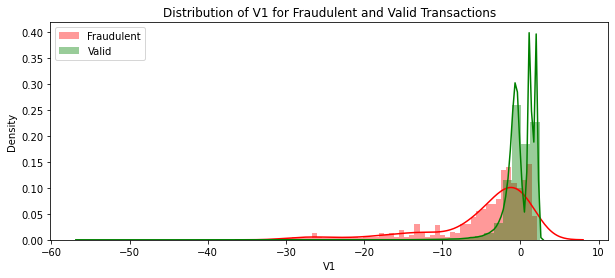

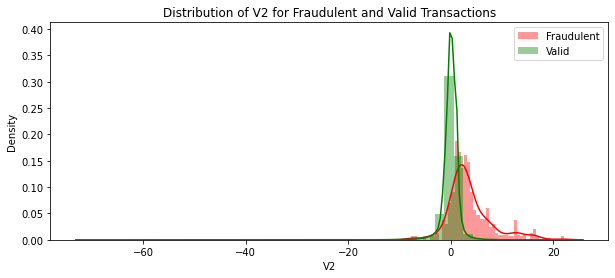

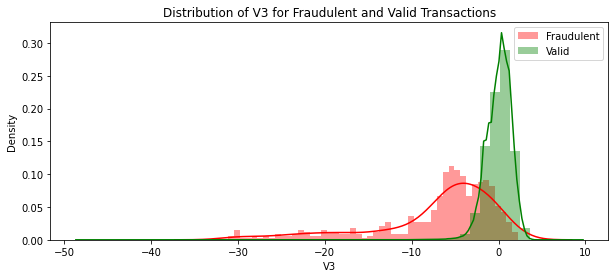

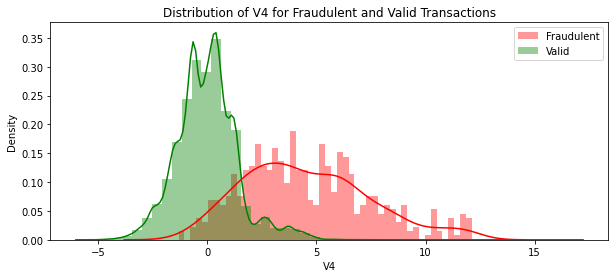

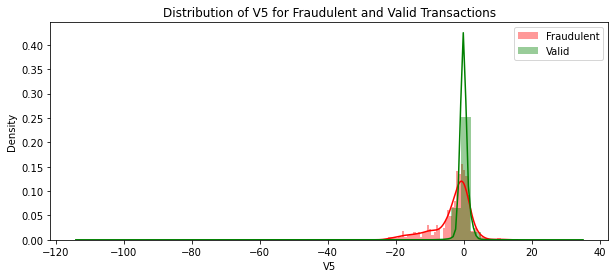

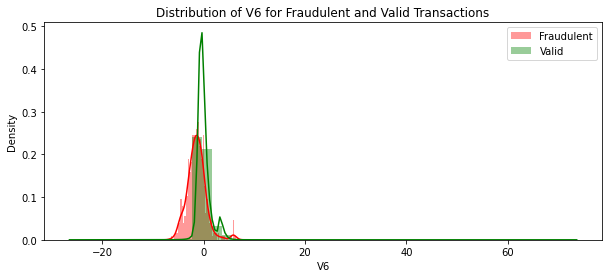

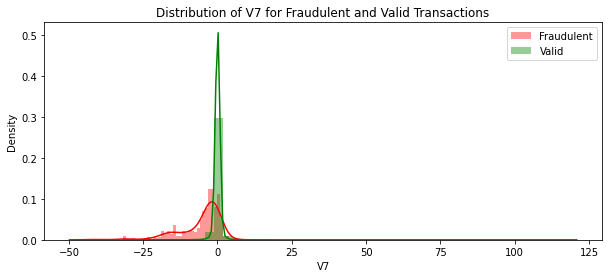

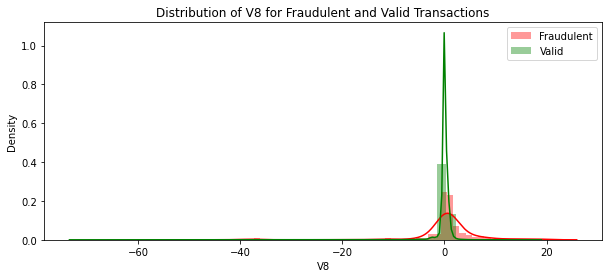

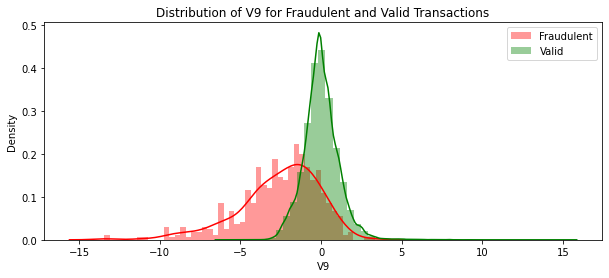

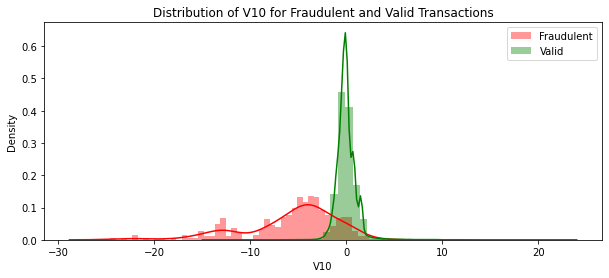

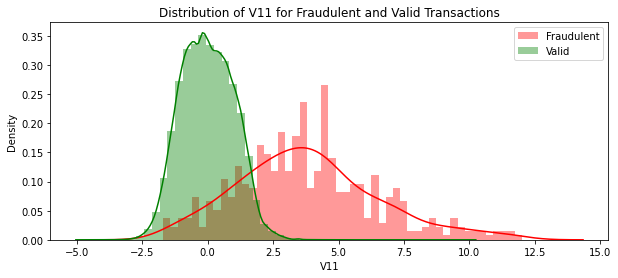

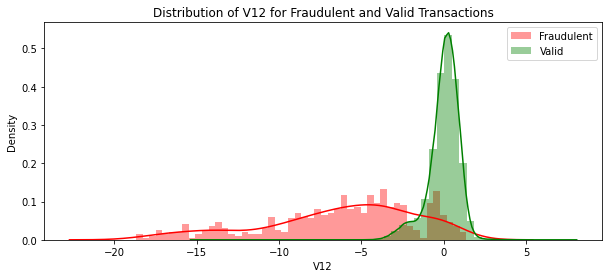

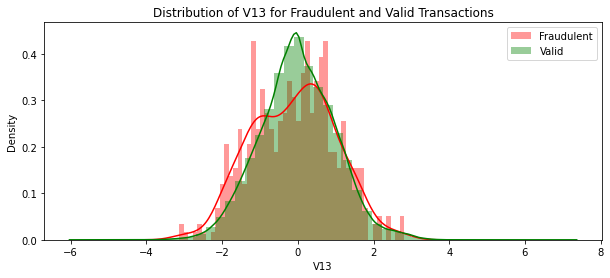

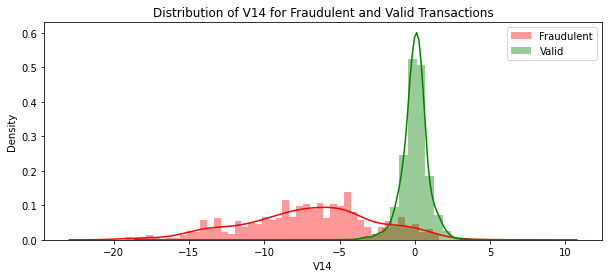

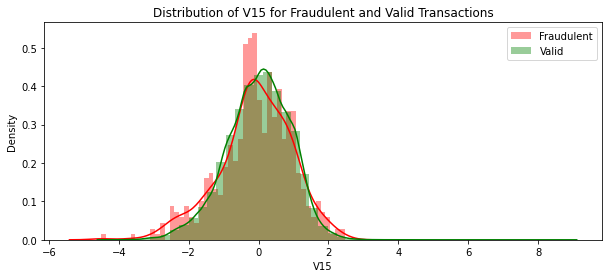

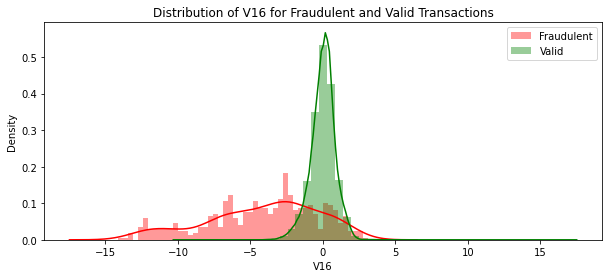

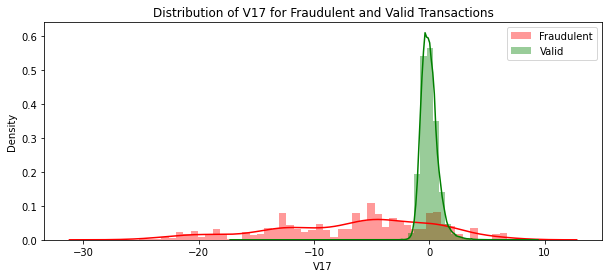

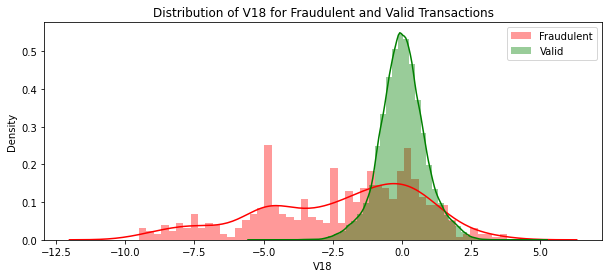

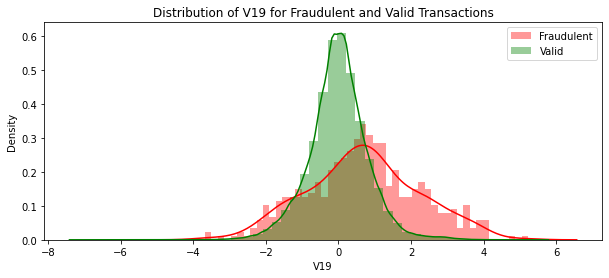

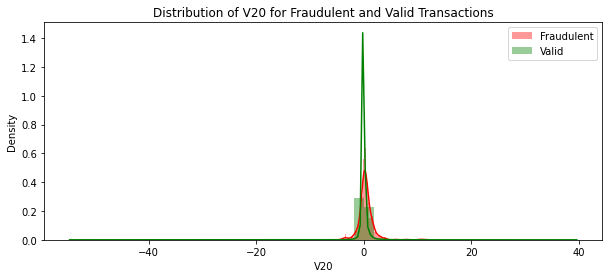

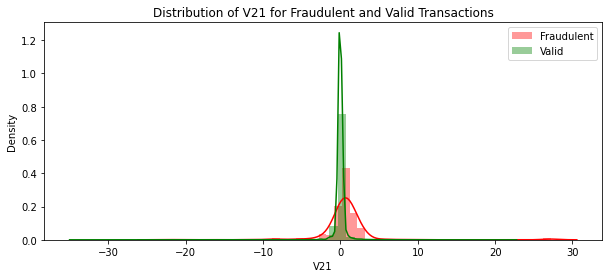

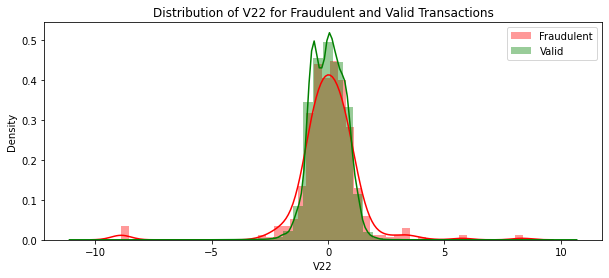

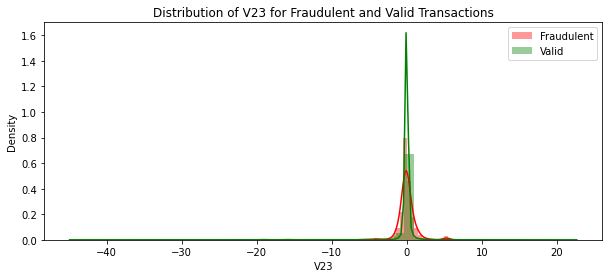

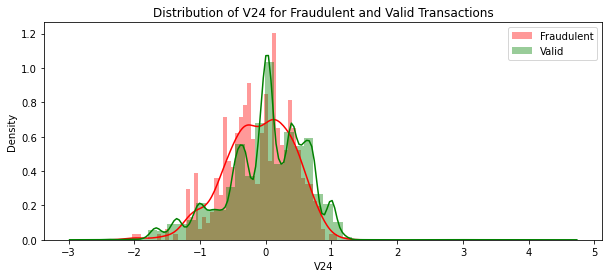

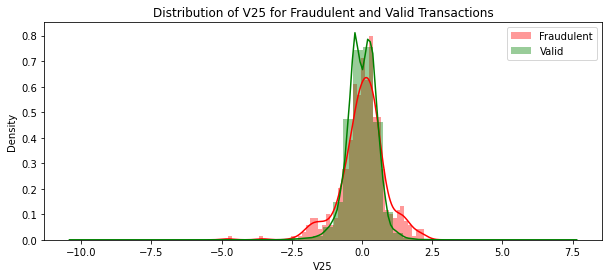

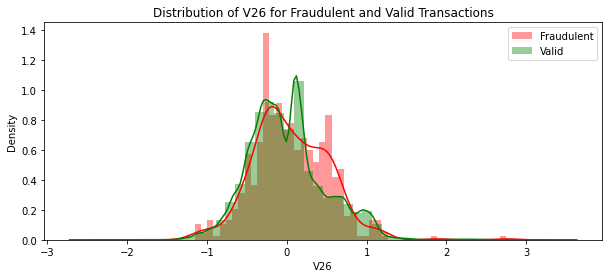

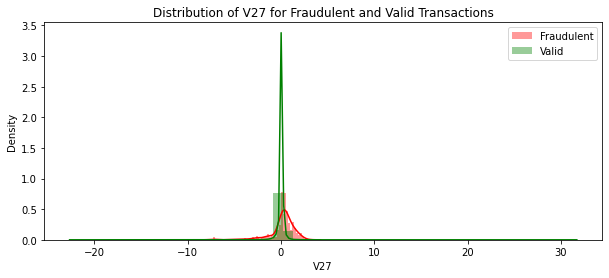

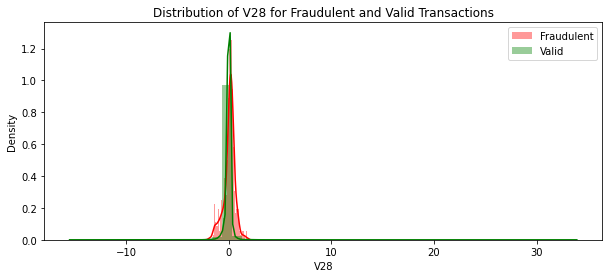

In [4]:
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
           'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
           'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']  # Add more columns if needed

for col in columns:
    plt.figure(figsize=(10, 4))
    sns.distplot(credit_card_data[col][credit_card_data.Class == 1], bins=50, color='r', label='Fraudulent')
    sns.distplot(credit_card_data[col][credit_card_data.Class == 0], bins=50, color='g', label='Valid')
    plt.title(f'Distribution of {col} for Fraudulent and Valid Transactions')
    plt.legend()
    plt.show()

# Correlation Analysis

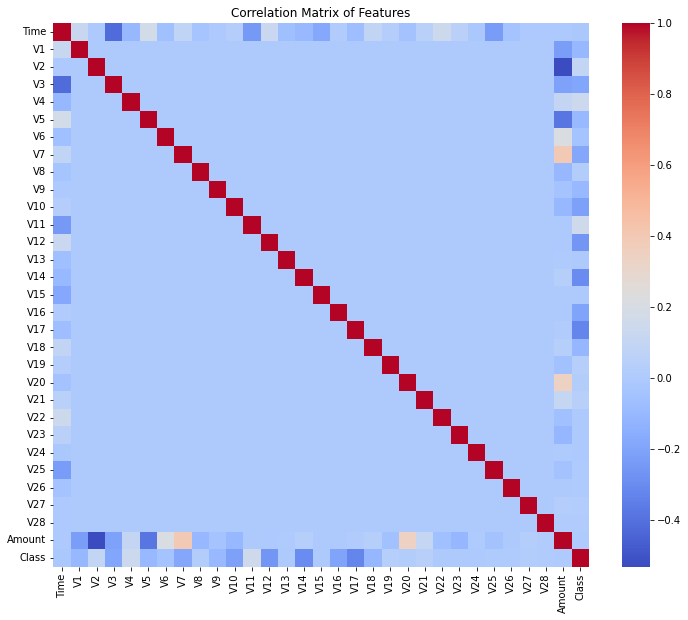

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(credit_card_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

# Feature Engineering: Standardization of 'Time' & 'Amount' 

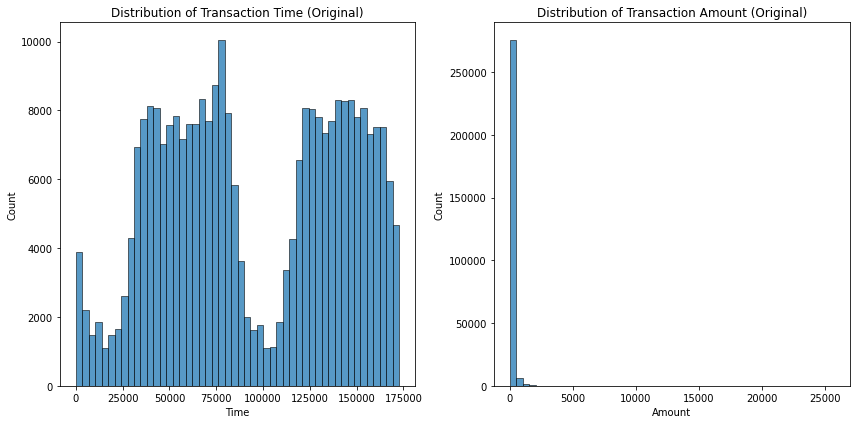

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(credit_card_data['Time'], bins=50, kde=False)
plt.title('Distribution of Transaction Time (Original)')

plt.subplot(1, 2, 2)
sns.histplot(credit_card_data['Amount'], bins=50, kde=False)
plt.title('Distribution of Transaction Amount (Original)')

plt.tight_layout()
plt.show()

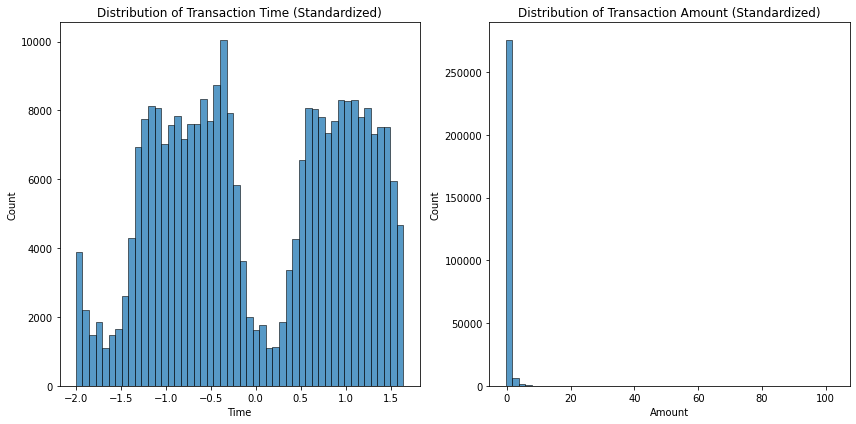

In [7]:
scaler = StandardScaler()

credit_card_data_original = credit_card_data.copy()

credit_card_data[['Time', 'Amount']] = scaler.fit_transform(credit_card_data[['Time', 'Amount']])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(credit_card_data['Time'], bins=50, kde=False)
plt.title('Distribution of Transaction Time (Standardized)')

plt.subplot(1, 2, 2)
sns.histplot(credit_card_data['Amount'], bins=50, kde=False)
plt.title('Distribution of Transaction Amount (Standardized)')

plt.tight_layout()
plt.show()

# Data Preprocessing and Imbalanced Learning

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sampling_strategies = {
    '10:90': 0.1,
    '34:66': 0.34
}

for name, strategy in sampling_strategies.items():
    over = SMOTE(sampling_strategy=strategy)
    under = RandomUnderSampler(sampling_strategy=strategy)
    pipeline = Pipeline(steps=[('o', over), ('u', under)])
    
    X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
    
    resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
    resampled_data.to_csv(f'training_data_{name}.csv', index=False)

In [12]:
import imblearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

desired_ratio_minority = {
    '10:90': 0.1,
    '34:66': 0.34
}

for name, ratio in desired_ratio_minority.items():
    over = SMOTE(sampling_strategy=ratio)
    under = RandomUnderSampler(sampling_strategy=ratio)
    pipeline = Pipeline(steps=[('o', over), ('u', under)])
    
    X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
    
    resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
    resampled_data.to_csv(f'training_data_{name}.csv', index=False)

X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

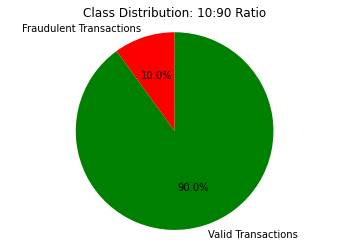

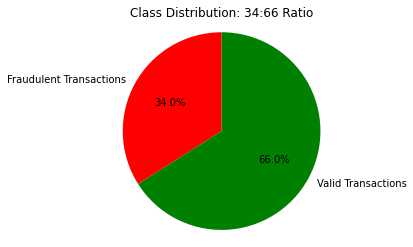

In [15]:
import matplotlib.pyplot as plt

def plot_class_distribution_piechart(ratio, title):
    labels = ['Fraudulent Transactions', 'Valid Transactions']
    sizes = [ratio, 1 - ratio]  # Convert ratio to percentage

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
    ax.axis('equal')  
    plt.title(title)
    plt.show()

plot_class_distribution_piechart(0.10, 'Class Distribution: 10:90 Ratio')

plot_class_distribution_piechart(0.34, 'Class Distribution: 34:66 Ratio')